<a href="https://colab.research.google.com/github/ailinnesse/Storytelling-with-Data/blob/main/MRI_storytelling_with_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visuals for Storytelling with data course Capsone Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [17]:
# Load the file with aggrigazted model results
ploaded = files.upload()


Saving MRI_model_results.xlsx to MRI_model_results.xlsx


In [18]:
model_results = pd.read_excel('MRI_model_results.xlsx', sheet_name='Sheet1')
model_results.head()

,True Label,Predicted Label,Count
0,Mild Demented,Mild Demented,67
1,Mild Demented,Moderate Demented,0
2,Mild Demented,No Disease,21
3,Mild Demented,Very Mild Demented,91
4,Mild Demented,Glioma Tumor,0


In [19]:
# Compute the total counts per true label
total_counts = model_results.groupby('True Label')['Count'].sum().reset_index()
total_counts = total_counts.rename(columns={'Count': 'Total Count'})

In [20]:
# Compute the counts of correct predictions per true label
correct_predictions = model_results[model_results['True Label'] == model_results['Predicted Label']]
correct_counts = correct_predictions.groupby('True Label')['Count'].sum().reset_index()
correct_counts = correct_counts.rename(columns={'Count': 'Correct Count'})

In [21]:
class_names_list = ['Mild Demented', 'Moderate Demented', 'No Disease', 'Very Mild Demented', 'Glioma Tumor', 'Meningioma Tumor', 'Pituitary Tumor']

In [22]:
# Merge the total counts with the correct counts
merged_counts = pd.merge(total_counts, correct_counts, on='True Label', how='left')
merged_counts['Correct Count'] = merged_counts['Correct Count'].fillna(0)

# Calculate the accuracy percentage for each class
merged_counts['Accuracy (%)'] = (merged_counts['Correct Count'] / merged_counts['Total Count']) * 100

# Ensure all classes are represented, even if they have zero correct predictions
for class_name in class_names_list:
    if class_name not in merged_counts['True Label'].values:
        merged_counts = merged_counts.append({
            'True Label': class_name,
            'Total Count': 0,
            'Correct Count': 0,
            'Accuracy (%)': 0
        }, ignore_index=True)

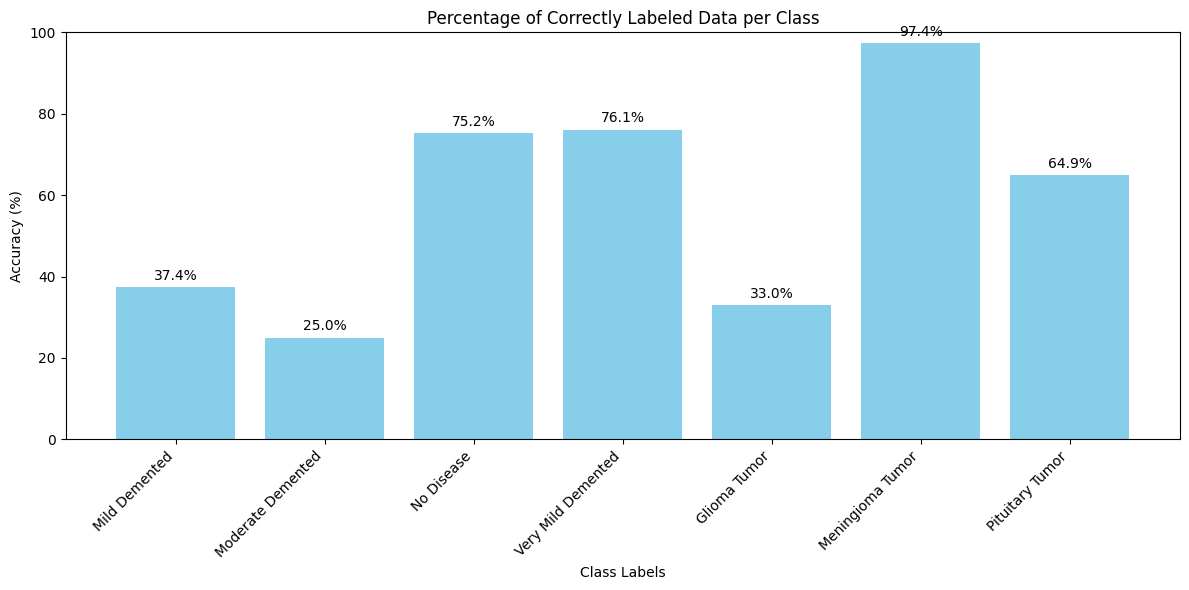

In [23]:
# Sort the DataFrame by class names for consistent plotting
merged_counts = merged_counts.set_index('True Label').loc[class_names_list].reset_index()

# Plot the percentage of correctly labeled data per class
plt.figure(figsize=(12, 6))
bars = plt.bar(merged_counts['True Label'], merged_counts['Accuracy (%)'], color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Accuracy (%)')
plt.title('Percentage of Correctly Labeled Data per Class')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Annotate the bars with the accuracy percentage
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [25]:
import plotly.graph_objs as go
from plotly.colors import n_colors

# Generate a color scale
colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', len(merged_counts), colortype='rgb')

# Create the bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=merged_counts['True Label'],
    y=merged_counts['Accuracy (%)'],
    marker_color=colors,
    text=[f'{acc:.1f}%' for acc in merged_counts['Accuracy (%)']],
    textposition='auto'
))

# Update the layout of the figure
fig.update_layout(
    title='Percentage of Correctly Labeled Data per Class',
    xaxis_title='Class Labels',
    yaxis_title='Accuracy (%)',
    xaxis_tickangle=-45,
    yaxis_range=[0, 100],
    template='plotly_white',
    width=900,
    height=600
)

# Show the figure
fig.show()


In [26]:
import plotly.graph_objs as go

# Sort the data by 'Accuracy (%)' in descending order
merged_counts = merged_counts.sort_values(by='Accuracy (%)', ascending=False).reset_index(drop=True)

# Create the bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=merged_counts['True Label'],
    y=merged_counts['Accuracy (%)'],
    marker=dict(
        color=merged_counts['Accuracy (%)'],
        colorscale='RdYlGn',
        #reversescale=True,  # High values are green, low values are red
        cmin=0,
        cmax=100,
        showscale=False  # Hide the color scale bar
    ),
    text=[f'{acc:.1f}%' for acc in merged_counts['Accuracy (%)']],
    textposition='auto'
))

# Update the layout of the figure
fig.update_layout(
    title='Percentage of Correctly Labeled Data per Class',
    xaxis_title='Class Labels',
    yaxis_title='Accuracy (%)',
    xaxis_tickangle=-45,
    yaxis_range=[0, 100],
    template='plotly_white',
    width=900,
    height=600
)

# Show the figure
fig.show()


In [28]:
import plotly.graph_objs as go

# Sort the data by 'Accuracy (%)' in descending order
merged_counts = merged_counts.sort_values(by='Accuracy (%)', ascending=False).reset_index(drop=True)

# Create the horizontal bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=merged_counts['Accuracy (%)'],
    y=merged_counts['True Label'],
    orientation='h',
    marker=dict(
        color=merged_counts['Accuracy (%)'],
        colorscale='RdYlGn',
        #reversescale=True,  # High values are green, low values are red
        cmin=0,
        cmax=100,
        showscale=False  # Hide the color scale bar
    ),
    text=[f'{acc:.1f}%' for acc in merged_counts['Accuracy (%)']],
    textposition='inside',
    texttemplate='%{text}',
    insidetextanchor='middle'
))

# Update the layout of the figure
fig.update_layout(
    title='Percentage of Correctly Labeled Data per Class',
    xaxis_title='Accuracy (%)',
    yaxis_title='Class Labels',
    xaxis_range=[0, 100],
    yaxis=dict(
        autorange='reversed'  # Highest accuracies at the top
    ),
    template='plotly_white',
    width=900,
    height=600
)

# Show the figure
fig.show()
